In [233]:
import pandas as pd

data = pd.read_csv('C:/Users/Wang/Desktop/heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [235]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [237]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Data pre-processing

In [240]:
#Drop faulty data
data = data[data['ca'] < 4] #drop the wrong ca values #data 93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data = data[data['thal'] > 0] # drop the wong thal value #data 49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


In [242]:
#Rename the columns

data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")


In [244]:

data.loc[data['sex'] == 0, 'sex'] = 'female'   # data['sex'][data['sex'] == 0] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'     # data['sex'][data['sex'] == 1] = 'male'

data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'typical angina'     # data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'    # data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'   # data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'asymptomatic'       # data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data.loc[data['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'     # data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data.loc[data['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'   # data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data.loc[data['resting_electrocardiogram'] == 0, 'resting_electrocardiogram'] = 'normal'                         # data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data.loc[data['resting_electrocardiogram'] == 1, 'resting_electrocardiogram'] = 'ST-T wave abnormality'          # data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data.loc[data['resting_electrocardiogram'] == 2, 'resting_electrocardiogram'] = 'left ventricular hypertrophy'   # data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data.loc[data['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'     # data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data.loc[data['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'    # data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data.loc[data['st_slope'] == 0, 'st_slope'] = 'upsloping'     # data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data.loc[data['st_slope'] == 1, 'st_slope'] = 'flat'          # data['st_slope'][data['st_slope'] == 1] = 'flat'
data.loc[data['st_slope'] == 2, 'st_slope'] = 'downsloping'   # data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data.loc[data['thalassemia'] == 1, 'thalassemia'] = 'fixed defect'          # data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data.loc[data['thalassemia'] == 2, 'thalassemia'] = 'normal'                # data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data.loc[data['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'     # data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\2859087578.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['sex'] == 0, 'sex'] = 'female'   # data['sex'][data['sex'] == 0] = 'female'
C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\2859087578.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'typical angina' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'typical angina'     # data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\2859087578.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a 

In [246]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [248]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [250]:
#Grouping Features (by data type)
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\1524451045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['target'], palette=mypal[1::4])


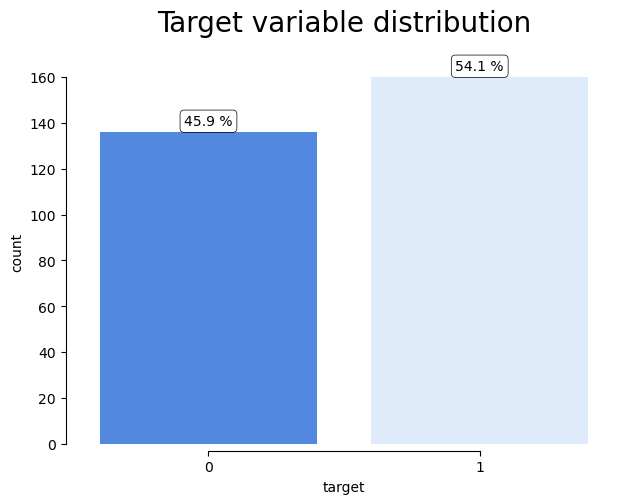

In [252]:
#Target distribution

import matplotlib.pyplot as plt
import seaborn as sns

mypal = ['#1E3A8A', '#3B82F6', '#60A5FA', '#93C5FD', '#BFDBFE', '#DBEAFE']

plt.figure(figsize=(7, 5),facecolor='white')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('white')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [254]:
#Statistical summary Numerical Features 

data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


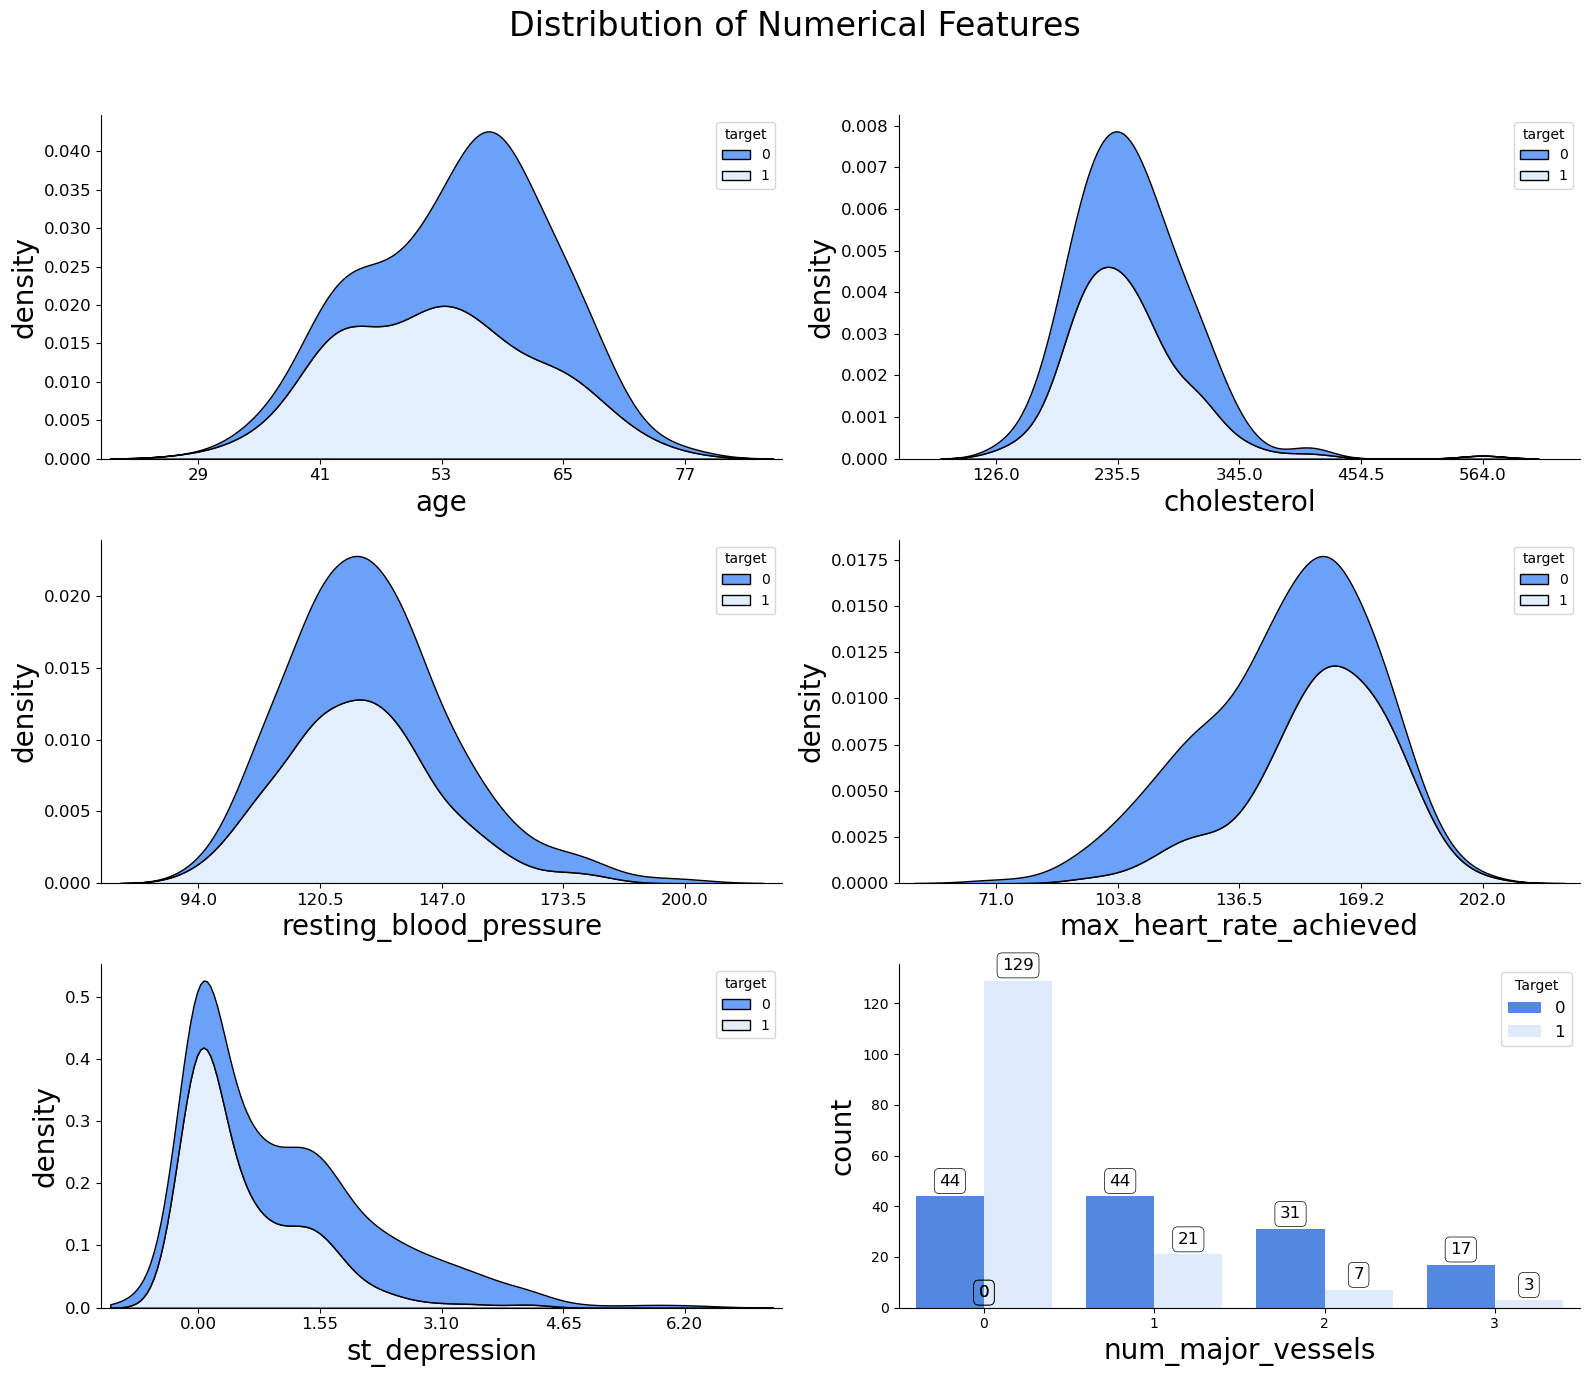

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='white')
fig.subplots_adjust(top=0.90)

# Flatten axes for easier indexing
axes = axes.flatten()

for i, col in enumerate(num_feats):
    ax = axes[i]  # Select the specific subplot
    
    if col == 'num_major_vessels':
        # For categorical variable
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        ax.legend(title="Target", fontsize=12)
        
        # Adding annotations
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.0f}'.format(height),
                    ha="center", va="bottom", fontsize=12,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    else:
        # For numerical variable
        sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("density", fontsize=20)
        
        # Adjust axis range
        #min_x, max_x = data[col].min(), data[col].max()
        #ax.set_xlim(min_x, max_x)
        # Adjust axis range with slight expansion
        min_x, max_x = data[col].min(), data[col].max()
        range_expand = (max_x - min_x) * 0.2
        ax.set_xlim(min_x - range_expand, max_x + range_expand)
        
        # Auto-scale y-axis to density values
        ax.set_ylim(0, ax.get_ylim()[1])  
        
        # Clear default ticks and set custom ticks
        x_ticks = np.linspace(min_x, max_x, 5)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

    # Remove spines for cleaner look
    sns.despine(ax=ax, right=True, top=True)
    ax.grid(False)  # Disable grid to prevent overlap

# Remove empty subplots if L < nrow * ncol
if L < len(axes):
    for j in range(L, len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap
plt.show()


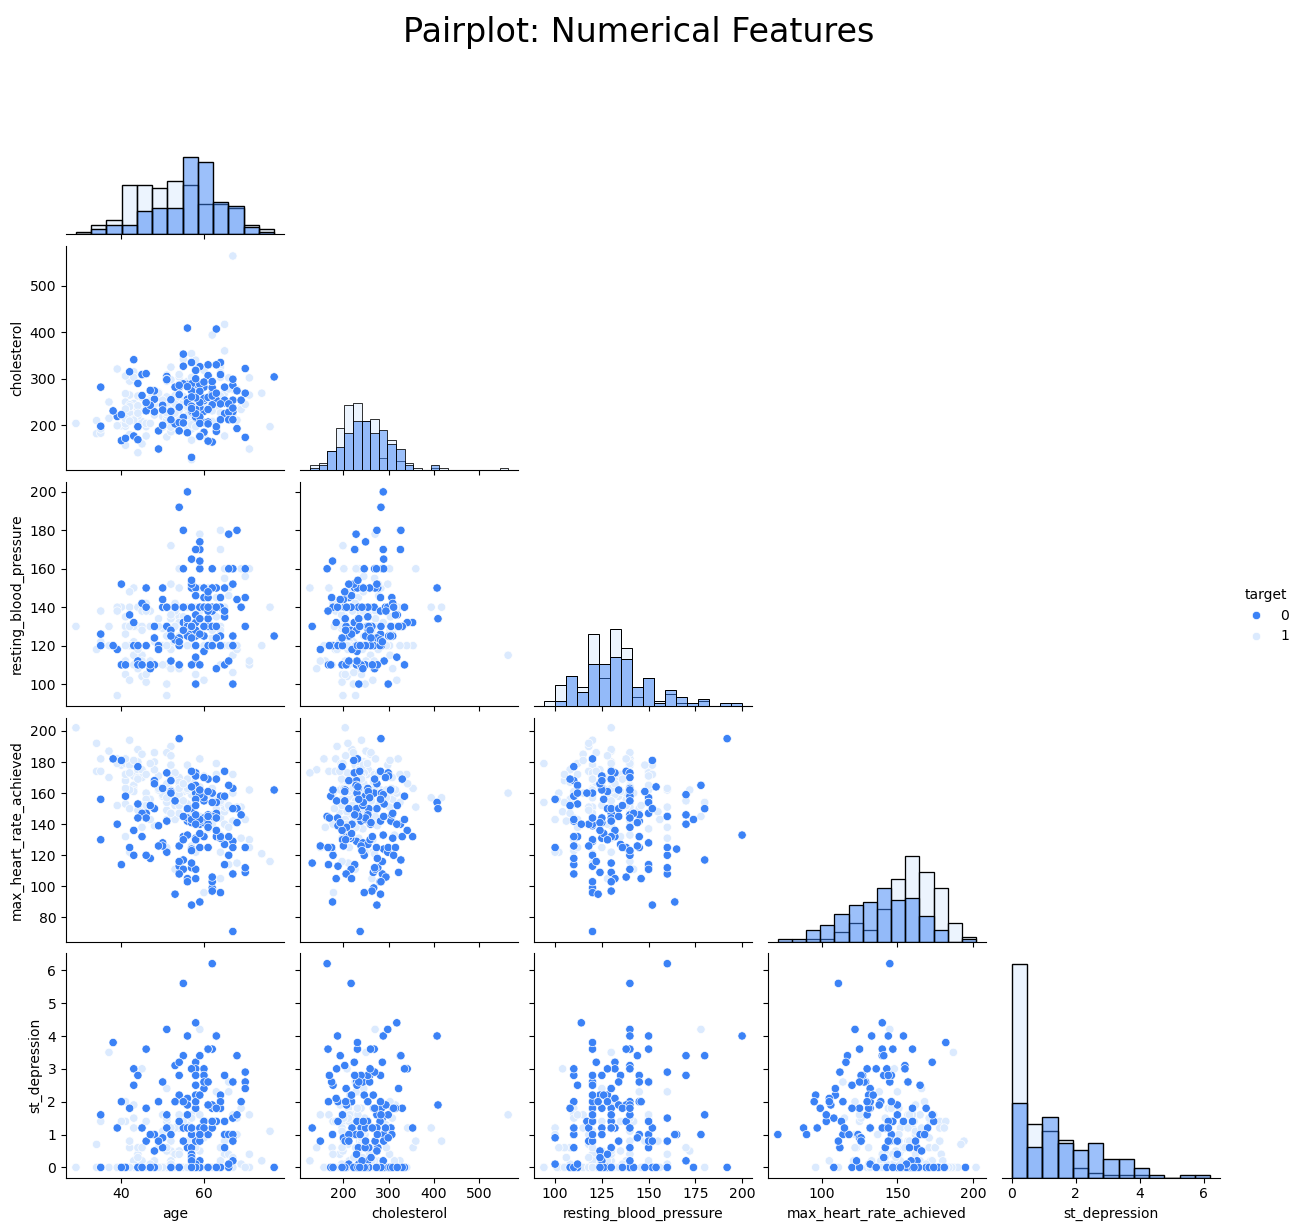

In [257]:
#Pairplot: Numerical Features
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

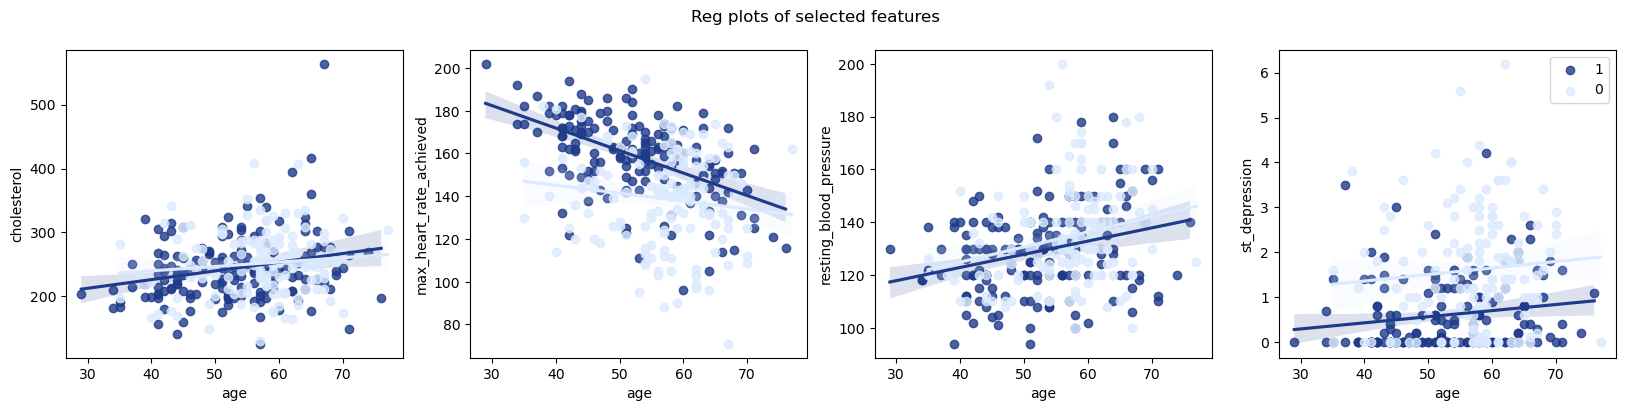

In [258]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

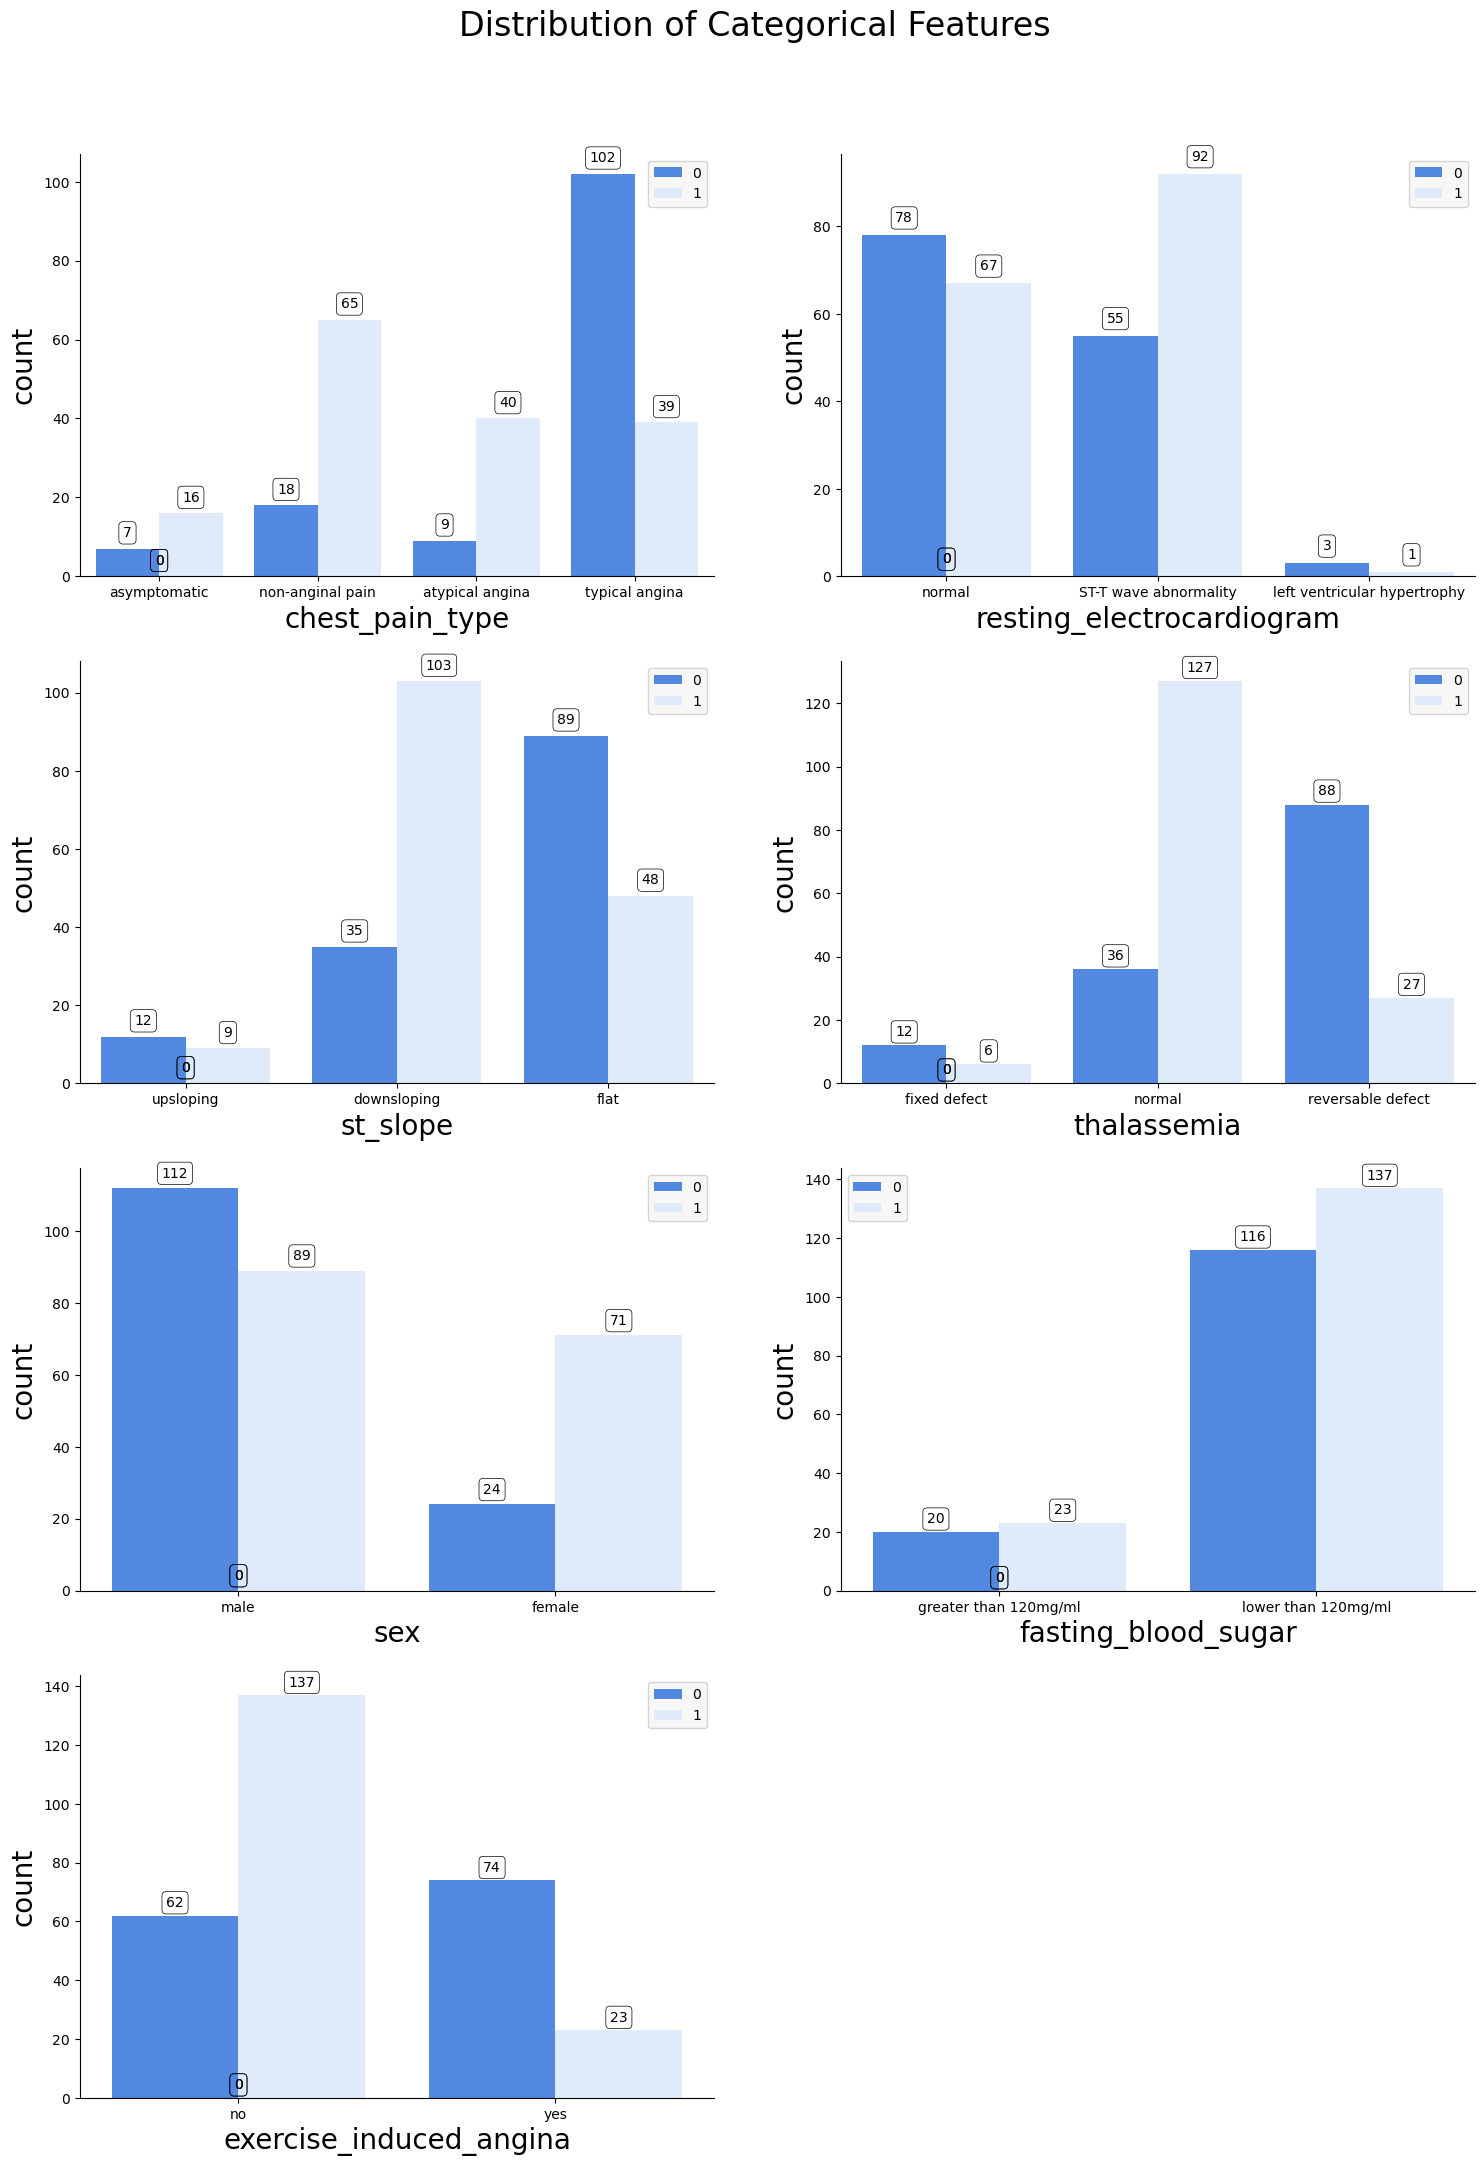

In [260]:
#Count Plots for Categorical features

def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24))    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i)
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

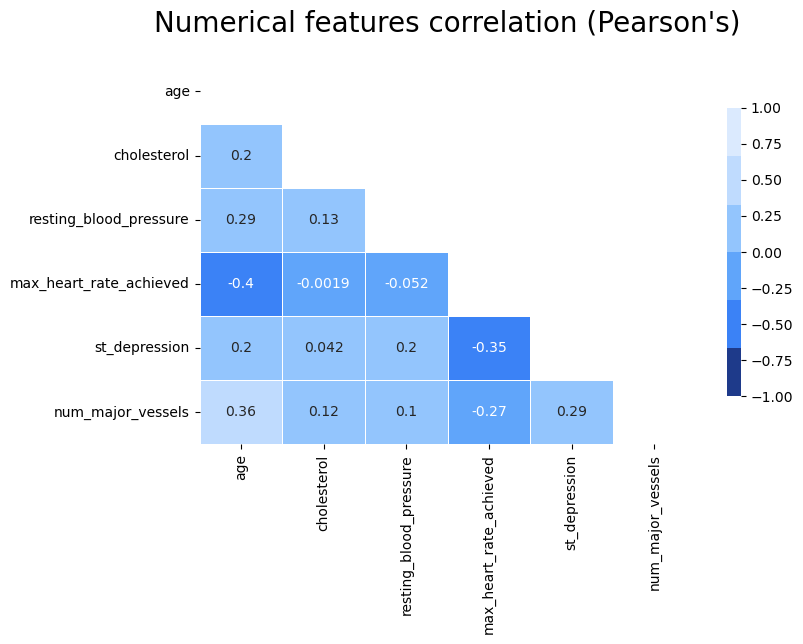

In [261]:
#Correlation Heatmaps
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

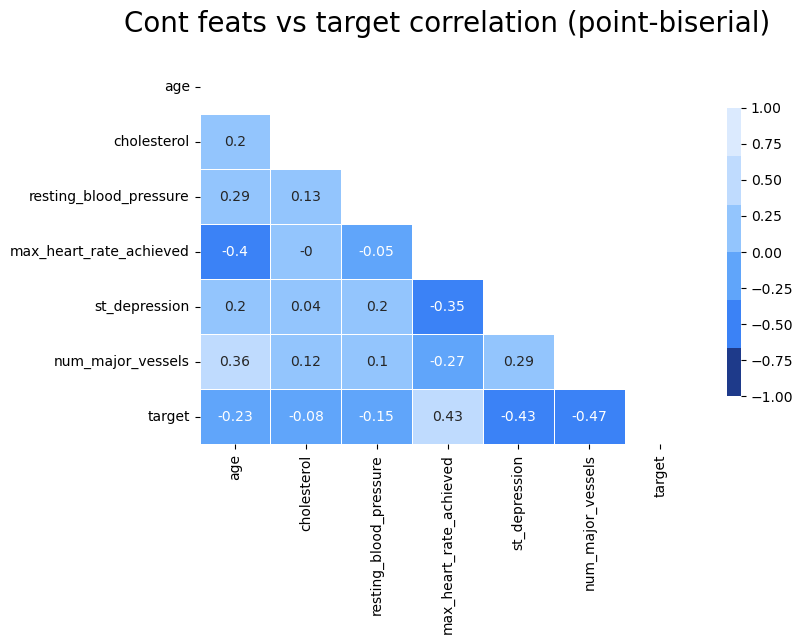

In [262]:
#Point biserial correlation

import scipy.stats as stats

feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);

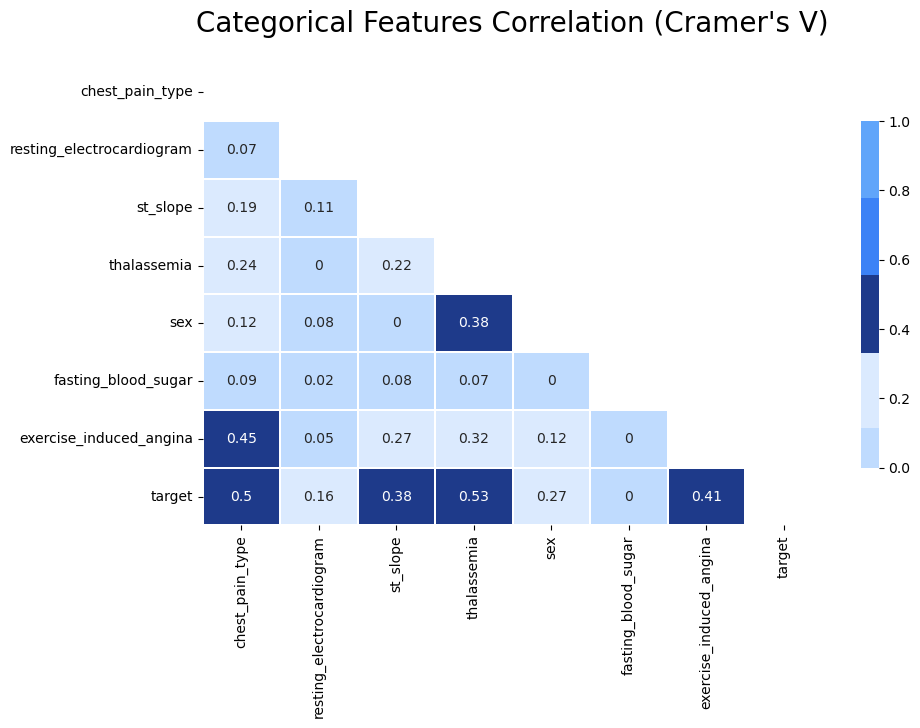

In [263]:
#Cramer's V correlation

# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#1E3A8A', '#3B82F6', '#60A5FA', '#93C5FD', '#BFDBFE', '#DBEAFE', '#1E3A8A', '#3B82F6', '#60A5FA']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

## Prediction

In [266]:
#pip install shap

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report #, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import shap 

In [269]:
def preprocess_data(data, cat_features, num_feats):
    '''
    Preprocess the data by applying:
    - One-Hot Encoding to categorical features
    - Min-Max Scaling to continuous features

    Parameters:
    - data: DataFrame to be processed
    - cat_features: List of categorical feature column names
    - cont_features: List of continuous feature column names

    Returns:
    - Processed DataFrame with encoded and scaled features
    '''
    
    # 複製原始資料
    data_processed = data.copy()
    
    
    # One-Hot Encoding
    
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop=None) 
    if cat_features:
        encoded_array = one_hot_encoder.fit_transform(data[cat_features])
        encoded_df = pd.DataFrame(
            encoded_array, 
            columns=one_hot_encoder.get_feature_names_out(cat_features),
            index=data.index
        )
        # 移除原始類別型特徵，合併編碼後的特徵
        data_processed = data_processed.drop(cat_features, axis=1)
        data_processed = pd.concat([data_processed, encoded_df], axis=1)
    
    
    # Min-Max Scaling
    
    scaler = MinMaxScaler()
    if num_feats:
        scaled_array = scaler.fit_transform(data[num_feats])
        scaled_df = pd.DataFrame(
            scaled_array, 
            columns=num_feats, 
            index=data.index
        )
        # 用縮放後的特徵替換原始連續型特徵
        data_processed[num_feats] = scaled_df
    
    return data_processed, scaler, one_hot_encoder



def preprocess_test_data(test_data, cat_features, num_feats, scaler, one_hot_encoder):
    '''
    Preprocess the test data using provided scaler and one-hot encoder.
    '''
    # One-Hot Encoding for test data
    if cat_features:
        encoded_array = one_hot_encoder.transform(test_data[cat_features])
        encoded_df = pd.DataFrame(
            encoded_array, 
            columns=one_hot_encoder.get_feature_names_out(cat_features),
            index=test_data.index
        )
        test_data = test_data.drop(cat_features, axis=1)
        test_data = pd.concat([test_data, encoded_df], axis=1)
    
    # Min-Max Scaling for test data
    if num_feats:
        scaled_array = scaler.transform(test_data[num_feats])
        scaled_df = pd.DataFrame(
            scaled_array, 
            columns=num_feats, 
            index=test_data.index
        )
        test_data[num_feats] = scaled_df
    
    return test_data

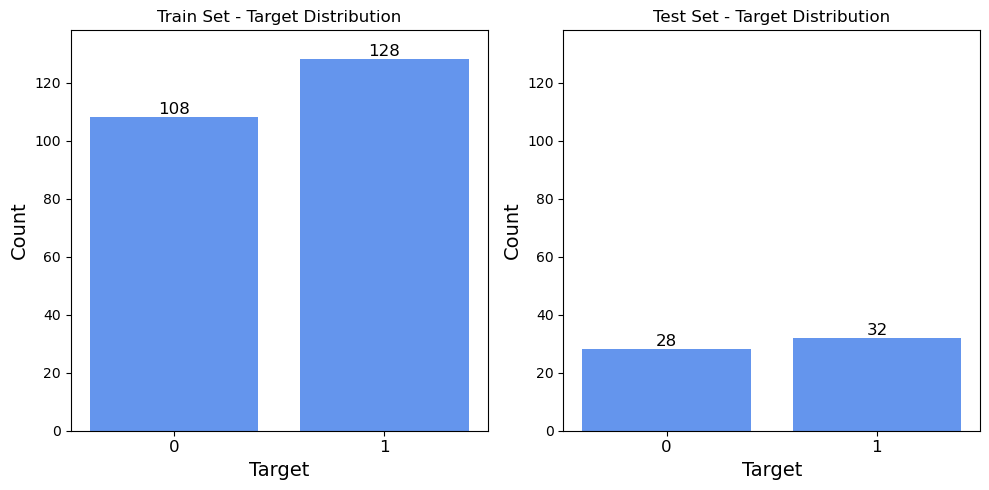

In [270]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical
cat_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']


# split the data into train and test sets

seed = 0
test_size = 0.2

#features = data.columns[:-1]

X = data.drop('target', axis=1)    # X = data[features]
y = data['target']                 # y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=seed, stratify=y) 

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# 預處理訓練資料
processed_train_data, scaler, one_hot_encoder = preprocess_data(train_data, cat_feats, num_feats)
processed_test_data = preprocess_test_data(test_data, cat_feats, num_feats, scaler, one_hot_encoder)


processed_train_data.to_csv("C:/Users/Wang/Desktop/processed_train_data.csv", index=False)
processed_test_data.to_csv("C:/Users/Wang/Desktop/processed_test_data.csv", index=False)



# 創建一個 1x2 的子圖 (1 行 2 列)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # figsize 控制整體大小

# 第一個圖是 train_data
x1 = processed_train_data['target'].value_counts().index
y1 = processed_train_data['target'].value_counts().values
axs[0].bar(x1, y1, color='cornflowerblue')  # 顏色可以更改
axs[0].set_xlabel('Target', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_title('Train Set - Target Distribution')  # 圖表標題
for a, b in zip(x1, y1):
    axs[0].text(a, b, str(b), ha='center', va='bottom', fontsize=12)  # 標注數值



    
# 第二個圖是 test_data
x2 = processed_test_data['target'].value_counts().index
y2 = processed_test_data['target'].value_counts().values
axs[1].bar(x2, y2, color='cornflowerblue')  # 顏色可以更改
axs[1].set_xlabel('Target', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_title('Test Set - Target Distribution')  # 圖表標題
for a, b in zip(x2, y2):
    axs[1].text(a, b, str(b), ha='center', va='bottom', fontsize=12)  # 標注數值

# 設定 x 軸
axs[0].set_xticks(x1)
axs[0].set_xticklabels([str(label) for label in x1], fontsize=12)
axs[1].set_xticks(x2)
axs[1].set_xticklabels([str(label) for label in x2], fontsize=12)

# 設定 y 軸
y_max = max(y1.max(), y2.max())
axs[0].set_ylim(0, y_max+10)
axs[1].set_ylim(0, y_max+10)
    
# 顯示子圖
plt.tight_layout() # 調整間距，防止標籤重疊
plt.show()

In [271]:
processed_train_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,fasting_blood_sugar_greater than 120mg/ml,...,chest_pain_type_typical angina,resting_electrocardiogram_ST-T wave abnormality,resting_electrocardiogram_left ventricular hypertrophy,resting_electrocardiogram_normal,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
225,0.854167,0.520408,0.099307,0.412214,0.464286,0.000000,0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
271,0.666667,0.408163,0.237875,0.564885,0.464286,0.666667,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
69,0.687500,0.306122,0.180139,0.702290,0.000000,0.000000,1,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
169,0.500000,0.469388,0.166282,0.641221,0.553571,0.000000,0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
120,0.729167,0.367347,0.397229,0.389313,0.357143,0.666667,1,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [273]:
processed_test_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,fasting_blood_sugar_greater than 120mg/ml,...,chest_pain_type_typical angina,resting_electrocardiogram_ST-T wave abnormality,resting_electrocardiogram_left ventricular hypertrophy,resting_electrocardiogram_normal,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
117,0.562500,0.265306,0.143187,0.694656,0.339286,0.000000,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
97,0.479167,0.142857,0.235566,0.580153,0.017857,1.000000,1,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19,0.833333,0.469388,0.249423,0.610687,0.321429,0.666667,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13,0.729167,0.163265,0.184758,0.557252,0.321429,0.000000,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
269,0.562500,0.367347,0.351039,0.244275,0.285714,0.000000,0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [293]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train = processed_train_data.drop('target', axis=1)    # X = data[features]
y_train = processed_train_data['target']                 # y = data['target']
X_test = processed_test_data.drop('target', axis=1)   
y_test = processed_test_data['target']


def plot_multiple_confusion_matrices(names, classifiers, X_test, y_test, nrows=4, ncols=3, fig_a=12, fig_b=12):
    """
    Plot confusion matrices for multiple classifiers.

    :param names: List of classifier names.
    :param classifiers: List of classifier objects.
    :param X_test: The test features.
    :param y_test: The true labels.
    :param nrows: Number of rows for subplots.
    :param ncols: Number of columns for subplots.
    :param fig_a: The width of the figure.
    :param fig_b: The height of the figure.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(fig_a, fig_b))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    
    for i, (name, clf) in enumerate(zip(names, classifiers)):
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Create ConfusionMatrixDisplay
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot(ax=axes[i], cmap='Blues', values_format='d')  # Plot on the ith subplot
        axes[i].set_title(name)
    
    plt.tight_layout()
    plt.show()

In [295]:
def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)

        pred_proba = clf.predict_proba(X_test)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_test, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)


    return(np.round(data_table.reset_index(drop=True), 2))


def plot_multiple_confusion_matrices(names, classifiers, X_test, y_test, nrows, ncols, fig_a, fig_b):
    """
    Plot confusion matrices for multiple classifiers.

    :param names: List of classifier names.
    :param classifiers: List of classifier objects.
    :param X_test: The test features.
    :param y_test: The true labels.
    :param nrows: Number of rows for subplots.
    :param ncols: Number of columns for subplots.
    :param fig_a: The width of the figure.
    :param fig_b: The height of the figure.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(fig_a, fig_b))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    
    for i, (name, clf) in enumerate(zip(names, classifiers)):
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Create ConfusionMatrixDisplay
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot(ax=axes[i], cmap='Blues', values_format='d')  # Plot on the ith subplot
        axes[i].set_title(name)
    
    plt.tight_layout()
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_test)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [297]:
# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

In [299]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\3256127214.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_table = pd.concat([data_table, df], ignore_index=True)
C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perc

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
5,Random Forest,88.330000,0.900000,0.910000,0.880000,0.890000
11,Neural Net,88.330000,0.880000,0.910000,0.880000,0.890000
0,Logistic Regression,86.670000,0.890000,0.910000,0.850000,0.880000
2,Support Vectors,86.670000,0.890000,0.880000,0.880000,0.880000
9,Linear DA,86.670000,0.880000,0.910000,0.850000,0.880000
6,AdaBoost,85.000000,0.880000,0.880000,0.850000,0.860000
3,Nu SVC,83.330000,0.900000,0.810000,0.870000,0.840000
7,Gradient Boosting,81.670000,0.850000,0.840000,0.820000,0.830000
8,Naive Bayes,81.670000,0.920000,0.810000,0.840000,0.830000
1,Nearest Neighbors,76.670000,0.840000,0.660000,0.880000,0.750000


C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Wang\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


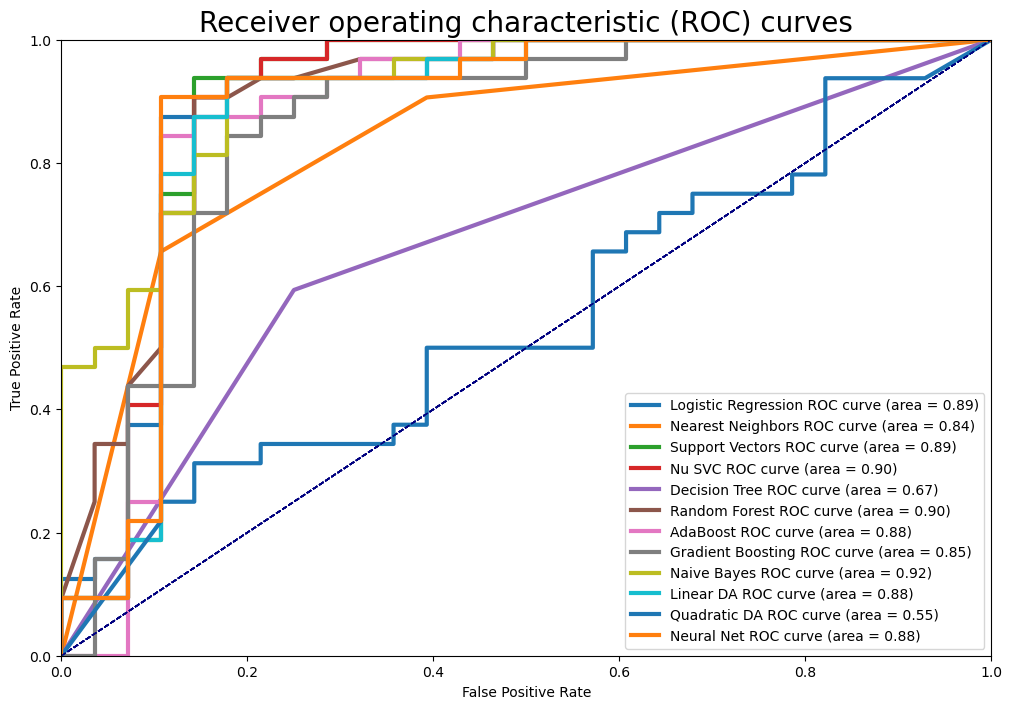

In [301]:
roc_auc_curve(names, classifiers)

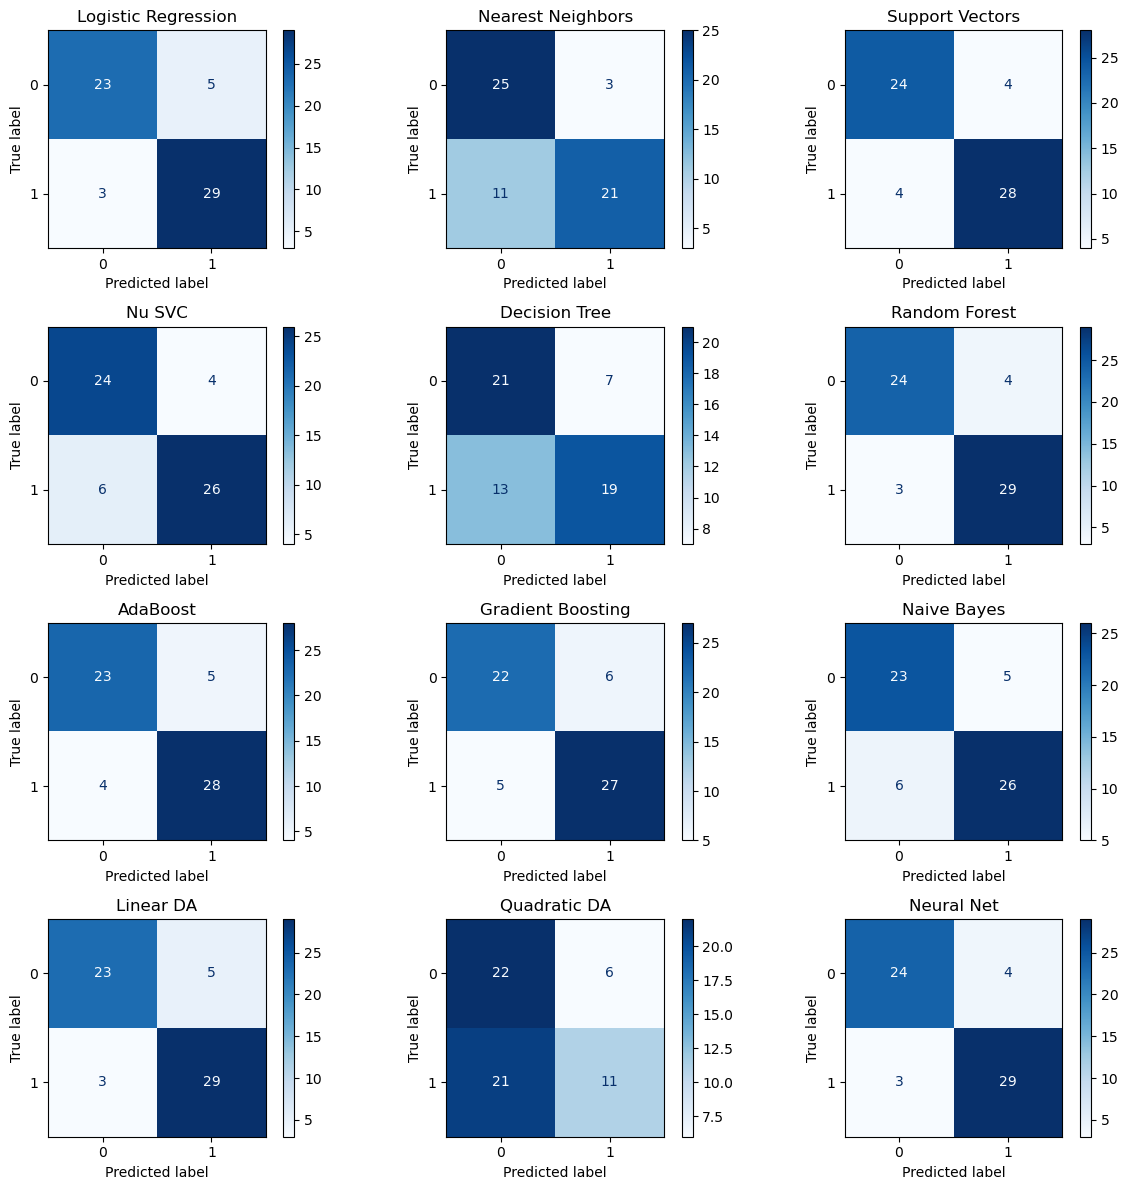

In [303]:
plot_multiple_confusion_matrices(names, classifiers, X_test, y_test, nrows=4, ncols=3, fig_a=12, fig_b=12)

## Parameter Tuning (RandomizedSearch): LogisticRegression

In [306]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 2.7440675196366238, 'penalty': 'l1', 'solver': 'liblinear'}


In [308]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.85      0.91      0.88        32

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [312]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[23,  5],
       [ 3, 29]], dtype=int64)

## Catboost, Lgbm and Xgboost 

In [315]:
#pip install catboost

In [317]:
#pip install xgboost

In [319]:
#pip install lightgbm

In [483]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    #'Catboost',
    'xgboost',
    #'light GBM'
]
classifiers = [
    #CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(booster='gbtree', n_estimators=100, learning_rate=0.3, random_state=seed,
                  max_depth=6, gamma=0, min_child_weight=1, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
                  max_delta_step=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, objective= 'binary:logistic'),
    #LGBMClassifier(random_state=seed)
   ]

In [485]:
score_summary(names_boost, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

C:\Users\Wang\AppData\Local\Temp\ipykernel_49784\3256127214.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_table = pd.concat([data_table, df], ignore_index=True)


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,xgboost,80.000000,0.880000,0.810000,0.810000,0.810000


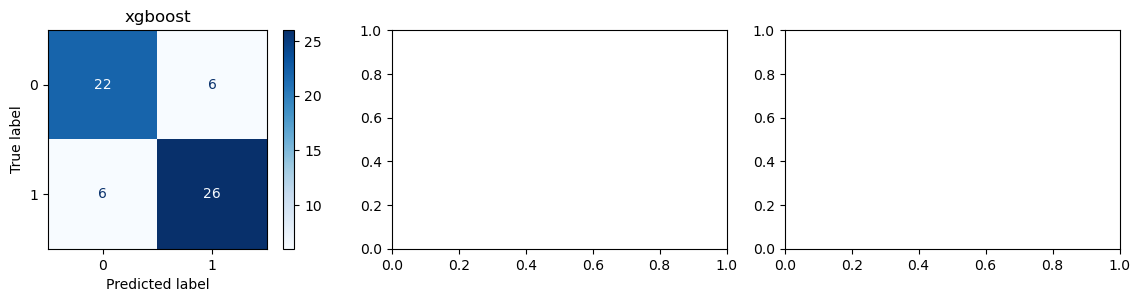

In [487]:
plot_multiple_confusion_matrices(names_boost, classifiers, X_test, y_test, nrows=1, ncols=3, fig_a=12, fig_b=3)

In [488]:
xgbm = XGBClassifier()

xgbm.fit(X_train, y_train)

print(classification_report(y_test, xgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.81      0.81      0.81        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



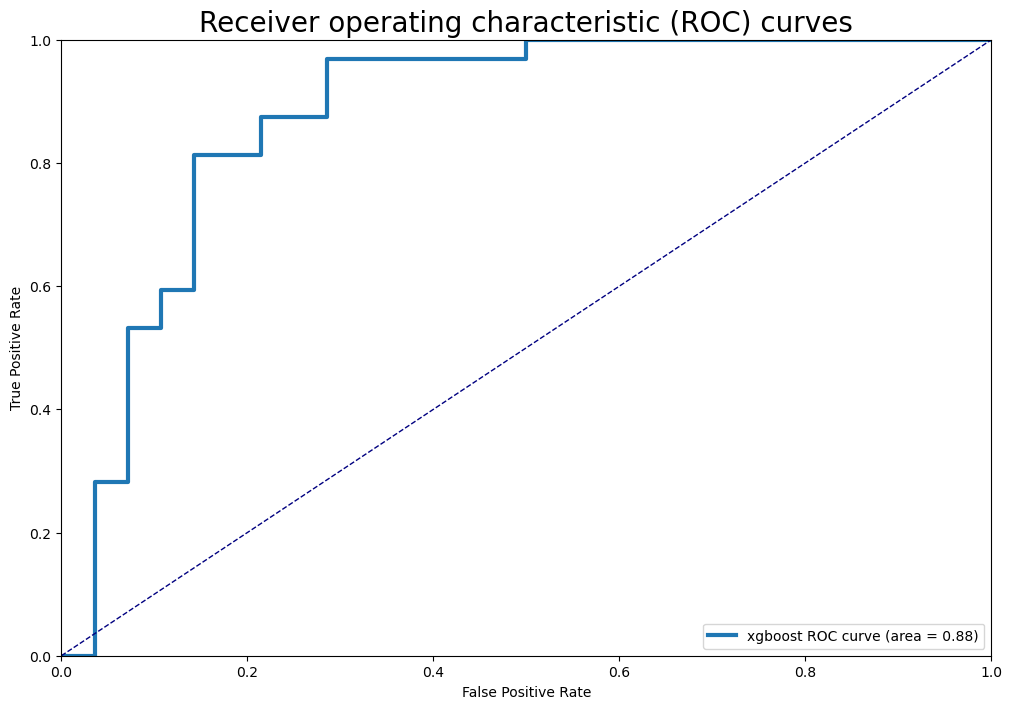

In [491]:
roc_auc_curve(names_boost, classifiers)

## Parameter Tuning (RandomizedSearch): LGBMClassifier

In [104]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120], 
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1), 
                           param_grid=rs_params, 
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [107]:
lgbm = LGBMClassifier(**params);

lgbm.fit(X_train, y_train, 
        eval_set=(X_test, y_test), 
)

print(classification_report(y_test, lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.77      0.96      0.86        28

    accuracy                           0.85        60
   macro avg       0.87      0.86      0.85        60
weighted avg       0.87      0.85      0.85        60



In [117]:
y_pred = lgbm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[24,  8],
       [ 1, 27]], dtype=int64)

## Model Explainablity 

In [125]:
#pip install eli5

In [149]:
"""
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())
"""

#fix the error: https://github.com/eli5-org/eli5/pull/40/commits/cabd4023bfd6e9fc8ddb41c22908556efbf57afa

'\nimport eli5\nfrom eli5.sklearn import PermutationImportance\n\nperm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)\neli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())\n'

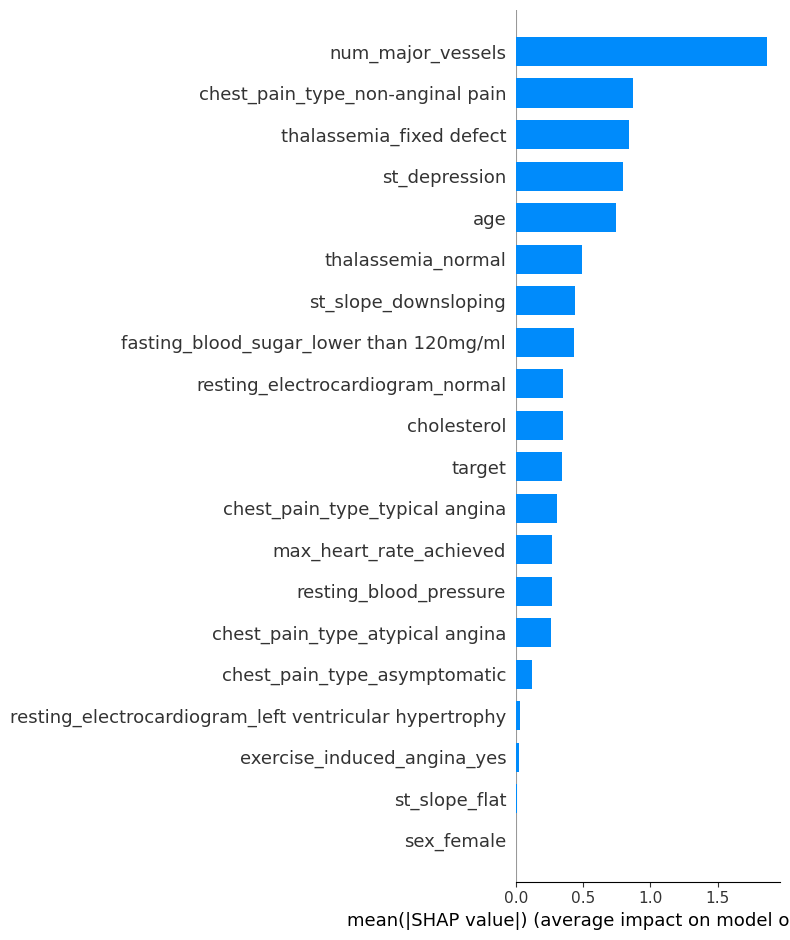

In [501]:
import shap

features = processed_test_data.columns[:-1]

shap.initjs()
explainer = shap.TreeExplainer(xgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, 
                  feature_names=features, 
                  plot_type="bar",
                 )

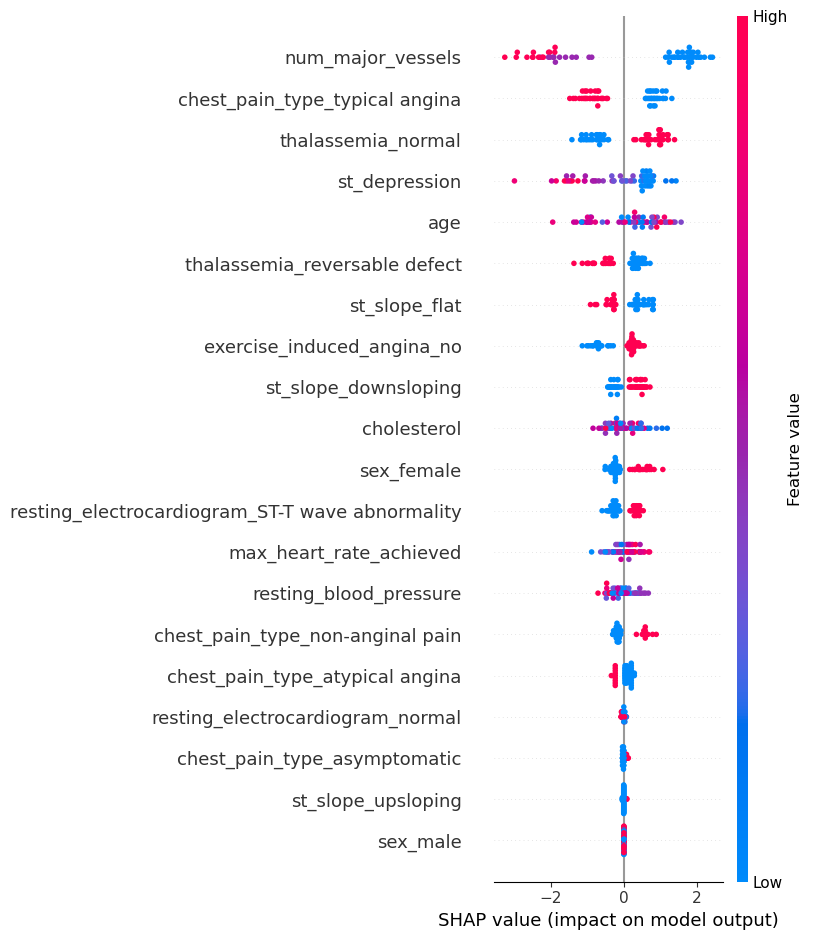

In [502]:
shap.summary_plot(shap_values, X_test)